In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import quilt
import seaborn as sns
%matplotlib inline

In [2]:
from quilt.data.akarve import fivethirtyeight as fte

In [3]:
fte

<PackageNode '/Users/karve/code/examples/quilt_packages/akarve/fivethirtyeight'>
ahca_polls/
airline_safety/
alcohol_consumption/
antiquities_act/
avengers/
bachelorette/
bad_drivers/
bechdel/
biopics/
births/
bob_ross/
buster_posey_mvp/
chess_transfers/
classic_rock/
college_majors/
comic_characters/
comma_survey_data/
congress_age/
congress_generic_ballot/
cousin_marriage/
daily_show_guests/
democratic_bench/
drug_use_by_age/
early_senate_polls/
elo_blatter/
endorsements_june_30/
fandango/
fifa/
flying_etiquette_survey/
food_world_cup/
forecast_methodology/
goose/
hate_crimes/
hip_hop_candidate_lyrics/
historical_ncaa_forecasts/
inconvenient_sequel/
infrastructure_jobs/
librarians/
love_actually/
mad_men/
male_flight_attendants/
march_madness_predictions/
march_madness_predictions_2015/
marriage/
mayweather_mcgregor/
mlb_allstar_teams/
most_common_name/
murder_2016/
nba_draft_2015/
nba_elo/
nba_tattoos/
nba_winprobs/
nfl_fandom/
nfl_favorite_team/
nfl_suspensions/
nfl_ticket_prices/


In [4]:
fte.nfl_fandom

<GroupNode>

NFL_fandom_data_google_trends
NFL_fandom_data_surveymonkey
README

In [5]:
goog = fte.nfl_fandom.NFL_fandom_data_google_trends()

In [6]:
goog.head()

,Unnamed: 0,Pct. Of major sports searches,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,DMA,NFL,NBA,MLB,NHL,NASCAR,CBB,CFB,Trump 2016 Vote%
1,Abilene-Sweetwater TX,45%,21%,14%,2%,4%,3%,11%,79.13%
2,Albany GA,32%,30%,9%,1%,8%,3%,17%,59.12%
3,Albany-Schenectady-Troy NY,40%,20%,20%,8%,6%,3%,4%,44.11%
4,Albuquerque-Santa Fe NM,53%,21%,11%,3%,3%,4%,6%,39.58%


In [7]:
# select 3 columns
nfl = goog[[goog.columns[x] for x in [0, 1, 8]]]
# promote row[0] to column names
nfl.columns = nfl.iloc[0]
# drop the first row, which is the labels
nfl = nfl.iloc[1:]
# convert to real percentages
nfl.NFL = nfl.NFL.map(lambda x: float(x[:-1])/100)
nfl[nfl.columns[2]] = nfl[nfl.columns[2]].map(lambda x:float(x[:-1])/100)

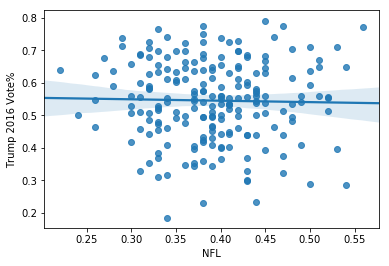

In [8]:
sns.regplot(x=nfl.columns[1], y=nfl.columns[2], data=nfl)

In [9]:
goog.columns

Index(['Unnamed: 0', 'Pct. Of major sports searches', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [10]:
# select 3 columns
spts = goog[[goog.columns[x] for x in range(9)]]
# promote row[0] to column names
spts.columns = spts.iloc[0]
# drop the first row, which is the labels
spts = spts.iloc[1:]
# for all of the XX% columns, turn them into floats
str_cols = [spts.columns[x] for x in [1,2,3,4,5,6,7]]
for c in str_cols:
    spts[c] = spts[c].map(lambda x: float(x[:-1])/100)
# turn the last column into a real %
spts[spts.columns[8]] = spts[spts.columns[8]].map(lambda x:float(x[:-1])/100)

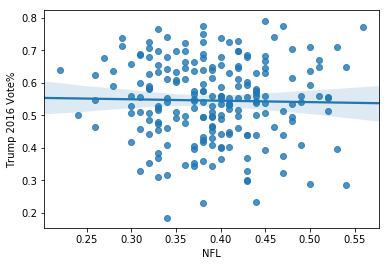

In [11]:
sns.regplot(x=spts.columns[1], y=spts.columns[8], data=spts)

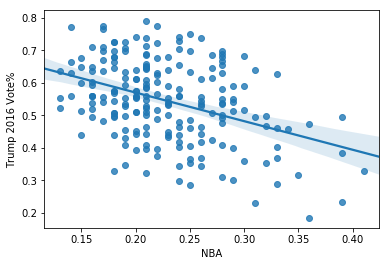

In [12]:
sns.regplot(x=spts.columns[2], y=spts.columns[8], data=spts)

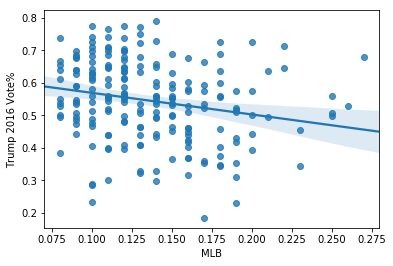

In [13]:
sns.regplot(x=spts.columns[3], y=spts.columns[8], data=spts)

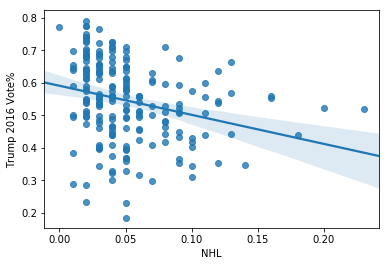

In [14]:
sns.regplot(x=spts.columns[4], y=spts.columns[8], data=spts)

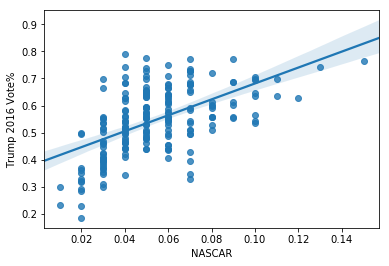

In [15]:
sns.regplot(x=spts.columns[5], y=spts.columns[8], data=spts)

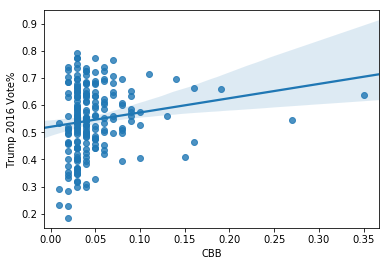

In [16]:
sns.regplot(x=spts.columns[6], y=spts.columns[8], data=spts)

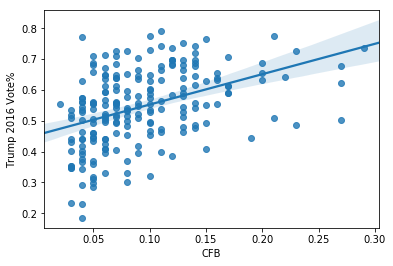

In [17]:
sns.regplot(x=spts.columns[7], y=spts.columns[8], data=spts)